<a href="https://colab.research.google.com/github/signife/VentureStartUp/blob/main/04_15_T_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy import stats



In [ ]:
data = np.random.randint(0,100,1000)

In [ ]:
data

array([96, 13,  4, 90, 52, 55, 38, 33, 10, 26,  5, 10,  9, 52, 98, 59, 20,
       83, 52, 23, 62, 84, 96, 54, 10, 37, 67, 24, 43, 67, 24, 25, 81, 47,
       80, 71, 38, 20,  8, 69, 25, 38, 41, 64, 49, 99, 88, 11, 39, 42, 36,
       89, 55, 87, 45, 16,  1, 66, 11, 23,  5, 51, 85, 95, 28, 64, 30, 53,
       47,  3, 55, 56, 67, 78, 55, 88, 95,  9, 52, 68, 94, 47, 83, 80, 97,
       91, 40, 56, 53,  4, 83, 10, 67, 37, 48, 32, 92, 41, 36, 92, 75, 45,
       56,  7, 39, 25,  3, 18, 68, 53, 66, 35,  6, 32, 27, 90, 95, 96,  8,
       10, 73, 66, 63, 38, 58, 73, 99, 73, 86, 54, 20, 37, 43, 89, 39, 17,
       96, 29,  5, 36, 55, 74, 92,  3, 23, 66, 14, 70, 74, 60, 76, 65, 91,
       18, 81, 62, 42,  2, 58, 69, 99, 23,  9,  8, 55, 32, 15, 93, 66, 45,
       28,  6, 64, 82, 68, 15, 57, 50, 50, 14, 20, 22, 91, 10, 90, 90, 91,
       27, 62, 69, 69, 20, 74, 95, 20, 56, 85, 61, 40, 83, 32, 77, 77, 72,
       56, 30, 41, 60, 41, 14, 57, 14, 56, 68, 39, 17, 98, 81, 31, 57, 43,
       18, 71, 38, 54, 65

In [ ]:
mean = np.mean(data)#평균
median = np.median(data)#중앙값
mode = stats.mode(data)#최빈값

print(mean)
print(median)
print(mode)#mode.mode   mode.count

49.104
49.0
ModeResult(mode=56, count=19)


In [ ]:
from statistics import variance,stdev #분산,표준편
import numpy as np

var = variance(data)
print(var)

std = stdev(data)
print(std)

802
28.319604517012593


In [ ]:
range_ = max(data) - min(data)
range_

99

In [ ]:
for index, temp in enumerate(range(0,101,25)):
    print(index+1,np.percentile(data,temp))

1 0.0
2 25.0
3 49.0
4 73.0
5 99.0


In [ ]:
print(np.percentile(data,75)-np.percentile(data,25)) # q3 - q1

48.0


In [ ]:
#출산율과 정규직 고용은 비례관계인가?

#대립가설: 고용 상태라면 출산율이 높을것이다
#귀무가설: 고용여부와 상관없이 출산율이 낮을것이다.
import pandas as pd
import scipy.stats as stats #t-test 라이브러리

df= pd.read_csv('student-mat.csv')

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


<Axes: xlabel='sex'>

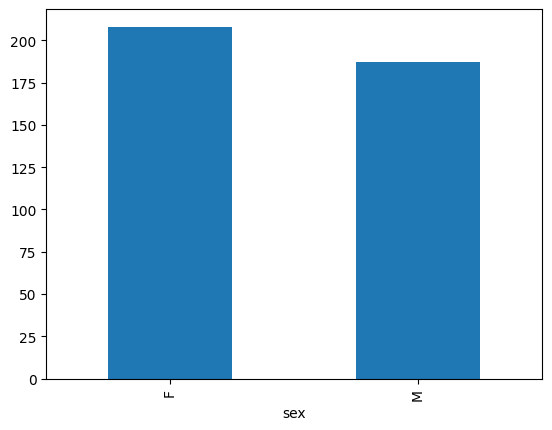

In [ ]:
df_sex = df.value_counts('sex')
df_sex.plot(kind='bar')

In [ ]:
df['sex'].unique() #소문자나 널값,확인

array(['F', 'M'], dtype=object)

In [ ]:
exam = df[['sex','G1','G2','G3']]
exam

,sex,G1,G2,G3
0,F,5,6,6
1,F,5,5,6
2,F,7,8,10
3,F,15,14,15
4,F,6,10,10
...,...,...,...,...
390,M,9,9,9
391,M,14,16,16
392,M,10,8,7
393,M,11,12,10


In [ ]:
mdata = exam[exam['sex']=='M']
fdata = exam[exam['sex']=='F']

mdata.describe()

,G1,G2,G3
count,187.000000,187.000000,187.000000
mean,11.229947,11.074866,10.914439
std,3.392839,3.868088,4.495297
min,3.000000,0.000000,0.000000
25%,9.000000,9.000000,9.000000
50%,11.000000,11.000000,11.000000
75%,14.000000,14.000000,14.000000
max,19.000000,19.000000,20.000000


In [ ]:
fdata.describe()

,G1,G2,G3
count,208.000000,208.000000,208.000000
mean,10.620192,10.389423,9.966346
std,3.232530,3.641851,4.622338
min,4.000000,0.000000,0.000000
25%,8.000000,8.000000,8.000000
50%,10.000000,10.000000,10.000000
75%,13.000000,13.000000,13.000000
max,19.000000,18.000000,19.000000


In [ ]:
stats.ttest_ind(mdata['G1'],fdata['G1'],equal_var=True)
stats.ttest_ind(mdata['G2'],fdata['G2'],equal_var=True) #성별간 차이없음
stats.ttest_ind(mdata['G3'],fdata['G3'],equal_var=True) #성별간 차이 있음

TtestResult(statistic=2.061992815503971, pvalue=0.039865332341527636, df=393.0)

In [ ]:
# @title 귤나무 수확한 귤 한개의 무게 100g 이상일 것이다(귀무)
import numpy as np
from scipy import stats

mu = 100 #모집단의 평균
mean = 95 #표본집단의 평균
sigma = 3.5 #모집단이ㅡ 표준 편차
n = 15 #표본집단의 크기

#단일 표본 t검증 : 표본의 크기가 30 미만으로 작고, 모집단의 분포가 정규 분포일때
#t통계량은?
t_s = (mean-mu)/ (sigma/np.sqrt(float(n)))
t_s

-5.532833351724881

In [ ]:
t_point = stats.t.ppf(0.05,n-1)
print(t_point)

-1.7613101357748564


In [ ]:
p_value = stats.t.sf(np.abs(t_s),n-1)
p_value #0.03으로 0.05보다 작음. 대립가설 체택. 100g 이하일 것이다.


3.68872012799116e-05

In [ ]:
s= 80
mean = 63
sigma = 12
result = (s-mean) / sigma
result

1.4166666666666667

In [ ]:
p_val = 1-stats.norm.cdf(result)
p_val = p_val*100
print(p_val) #80점 이상은 7.8

7.829020354481742


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

In [ ]:
df = pd.DataFrame({'성별':['남자','남자','남자','남자','남자',
                         '남자','남자','남자','남자','남자',
                         '남자','남자','남자','남자','남자',
                         '남자','남자','여자','여자','여자',
                         '여자','여자','여자','여자'],
                   "음주여부":['음주','음주','음주','비음주','음주',
                           '음주','음주','비음주','음주','음주','음주',
                           '음주','음주','음주','비음주','비음주',
                           '비음주','비음주','비음주','비음주','비음주',
                           '비음주','음주','비음주']
                   })
df

,성별,음주여부
0,남자,음주
1,남자,음주
2,남자,음주
3,남자,비음주
4,남자,음주
5,남자,음주
6,남자,음주
7,남자,비음주
8,남자,음주
9,남자,음주


In [ ]:
 df_drink = pd.crosstab(df['성별'],df['음주여부'],margins=False)
 df_drink

음주여부,비음주,음주
성별,,
남자,5,12
여자,6,1


In [ ]:
result = chi2_contingency(observed = df_drink, correction = False)
print("카이제곱 통계량:",result[0])
print("p-value:",result[1])
print("기대값 행렬:")
pd.DataFrame(result[3]).rename(index= {0:'남자',1:'여자'},columns={0:'비음주',1:'음주'})

카이제곱 통계량: 6.33108068402186
p-value: 0.011864000230647513
기대값 행렬:


,비음주,음주
남자,7.791667,9.208333
여자,3.208333,3.791667


In [ ]:
data =[1,2,3,3,4,1,1,20,1,2,3,2,1,1,2]

mean = np.mean(data)
std = np.std(data)
print(mean)
print(std)

3.1333333333333333
4.602414825091521


In [ ]:
threshold = 3

outlier = []
for i in data:
    z = (i-mean)/std

    if z > threshold or -threshold > z:
        print(z)
        outlier.append(i)

print(outlier)

3.664742816034899
[20]


In [ ]:
# @title iqr 이상치
import pandas as pd

def iqr_outlier(df=None, column = None):
    q1 = np.percentile(df[column].values, 25)
    q3 = np.percentile(df[column].values, 75)

    iqr = q3 - q1
    iqr_weight = iqr*1.5
    low_outlier = q1 - iqr_weight
    high_outlier = q3+iqr_weight

    outlier_idx = df[column][(df[column]<low_outlier)|(df[column]>high_outlier)].index

    return outlier_idx



In [ ]:
df = pd.DataFrame({'score':[1,2,3,3,4,1,1,20,1,2,3,2,1,1,2]})
df

,score
0,1
1,2
2,3
3,3
4,4
5,1
6,1
7,20
8,1
9,2


In [ ]:
print(iqr_outlier(df=df, column = 'score'))
print(df['score'][7])


Index([7], dtype='int64')
20
